# Project Proposal
### Group 14
By: Angela, Tina, Tom, and Yiyang

##### Title: Predicting the Risk of Diabetes

##### Introduction:

Our project will be on determining the risk of an individual to have diabetes. We will predict this using BMI and glucose levels as our variables. Diabetes is a lifelong health condition that affects how

How does BMI and glucose levels affect the risk of whether someone has diabetes or not in pregnant people?

##### Preliminary Exploratory Data Analysis:

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [4]:
diabetes_data <- read_csv("data/diabetes.csv")
diabetes_data

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


Our data set is already in tidy format as each row is a single observation of a patient, each column is a single variable, and each value is a single cell. We will filter our data, using filter(), to only consider those who have been pregnant before (pregnancies > 0). Moreover, we will convert the values in the diabetes column (<dbl>) to (<fct>) using the as_factor() function. 

In [5]:
diabetes_data <- diabetes_data |>
  mutate(Outcome = as_factor(Outcome)) |>
    filter(Pregnancies!=0)
diabetes_data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


In [16]:
set.seed(1400)

diabetes_split <- initial_split(diabetes_data, prop = 0.75, strata = Outcome)
diabetes_train <- training(diabetes_split)
diabetes_test <- testing(diabetes_split)

In [17]:
BMIGlucose_plot <- ggplot(diabetes_train, aes(x = BMI, y = Glucose, color = Outcome)) +
  geom_point(alpha = 0.6) +
  labs(x = "BMI", 
       y = "Glucose",
       color = "Diagnosis") +
ggtitle("BMI and Glucose plot")

In [18]:
BMIBloodpressure_plot <- ggplot(diabetes_train, aes(x = BMI, y = BloodPressure, color = Outcome)) +
  geom_point(alpha = 0.6) +
  labs(x = "BMI", 
       y = "Blood Pressure",
       color = "Diagnosis") +
ggtitle("BMI and blood pressure plot")

In [19]:
bloodpressureGlucose_plot <- ggplot(diabetes_train, aes(x = BloodPressure, y = Glucose, color = Outcome)) +
  geom_point(alpha = 0.6) +
  labs(x = "Blood Pressure", 
       y = "Glucose",
       color = "Diagnosis") +
ggtitle("Blood pressure and Glucose plot")

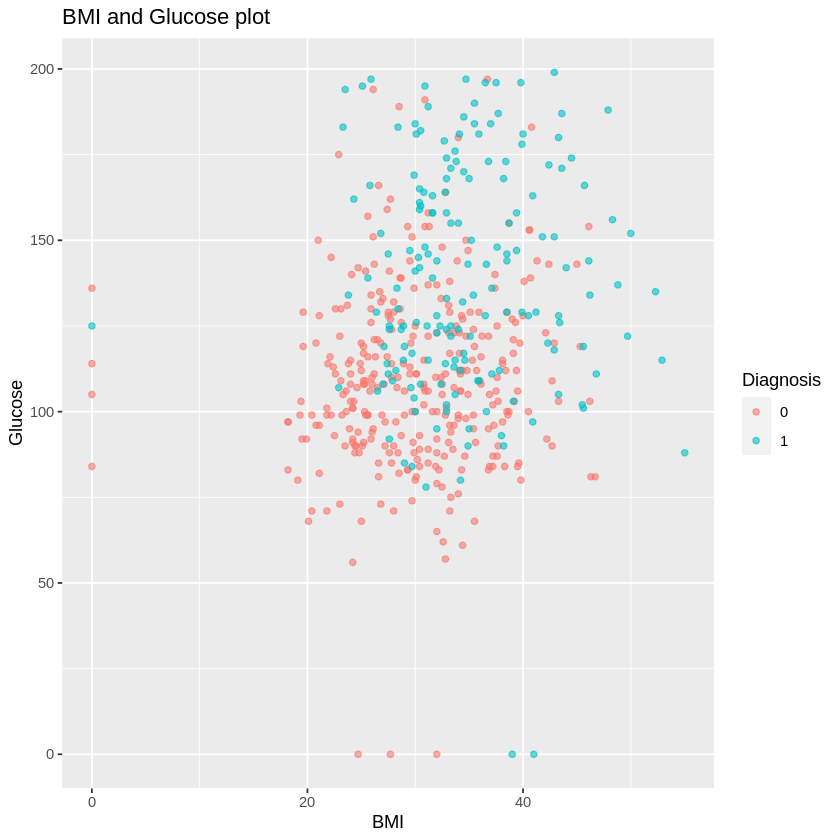

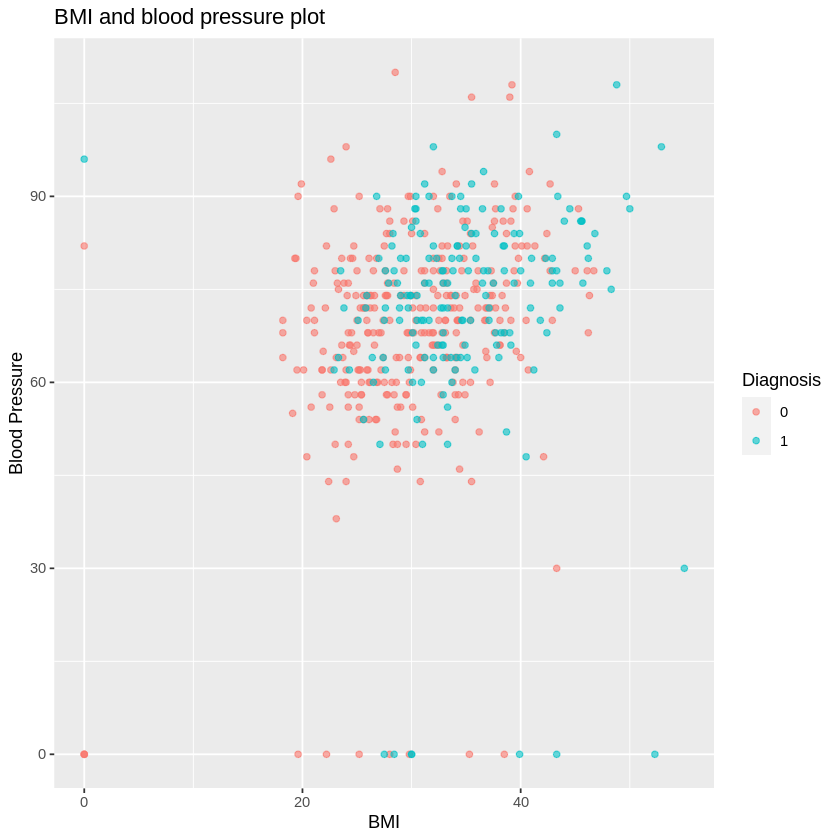

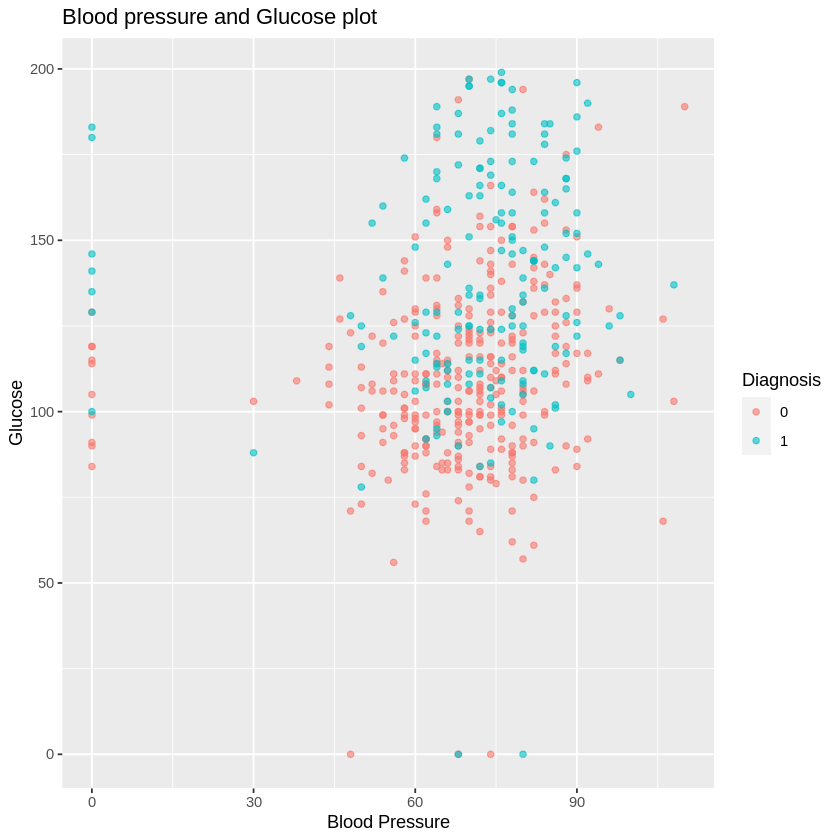

In [20]:
BMIGlucose_plot
BMIBloodpressure_plot
bloodpressureGlucose_plot

We are going to use the BMI and glucose plot because ...

##### Methods:
Using the information collected from online sources including research articles and scientific blogs, we will focus on Body Mass Index (BMI), glucose levels, and blood pressure, as our possible variables for evaluating our research question. From there we intend to graph those variables against each other and coloring the factor diabetes. We intend to visualize the data using a scatter plot, and picking the two variables that are best correlated in predicting diabetes. (intend plot should have two separate scatters with different colors). From there we confirm the two variables in the data set that work best in predicting and would run classification with those variables. 

##### Expected outcomes and significance:
Based on our research, people with health statistics of higher blood pressure, glucose levels, and BMI have a higher chance of having diabetes. We expect that our model will predict that people who pass a certain threshold number for blood pressure, glucose levels, and BMI will be predicted to have diabetes.

In 2021, approximately 537 million adults were found to be living with diabetes and this number is projected to increase to 643 million by 2030. This is a disease that can impact anyone regardless of their race, gender, ethnicity, or economic status. Both the number of cases and prevalence of diabetes have been steadily rising over the years. If our model is able to accurately diagnose a patient based on past data, it will impact the lives of many people around the world as many people go undiagnosed for years before realizing that they need health care attention.

For future predictions, our model can be refined from a simple “yes” or “no” answer to a percentage that can predict the risk that an individual has for diabetes. This will ensure that measures can be taken to slow down or prevent the onset of diabetes through lifestyle changes or medications. This will not only speed up the process of diagnoses for doctors but also provides the patient with an assessment of their own health and any associated risks.
